# 미국 출생률 데이터

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [7]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum') # 연대 별 남녀 출생 수

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


### 시각화 해보기

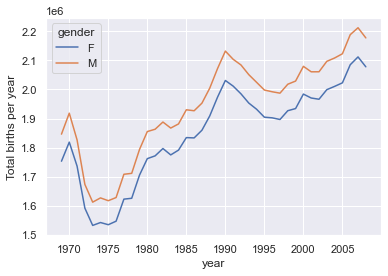

In [12]:
sns.set()
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel('Total births per year')
plt.show()

## pandas 문자열 탐색

In [34]:
import numpy as np
x = np.array([2,3,5,7,11,13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [35]:
data = ['peter','paul','mary','guido']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [37]:
import pandas as pd
names = pd.Series(data)
names
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

In [38]:
monte = pd.Series(['Graham Chapman','John Cleese','Terry Gilliam','Eric Idle',
                   'Terry Jones', 'Michael Palin'])

In [39]:
monte.str.lower() # 소문자화 

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [40]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [41]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [42]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

## 미국 출생률에 휴일이 미치는 영향 (page 312)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [13]:
quartiles =np.percentile(births['births'], [25, 50, 75])

mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = '%Y%m%d')

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

/var/folders/4f/jnlgcb9n6pg311w43wdsllwc0000gn/T/ipykernel_19585/2590709851.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]


<AxesSubplot:>

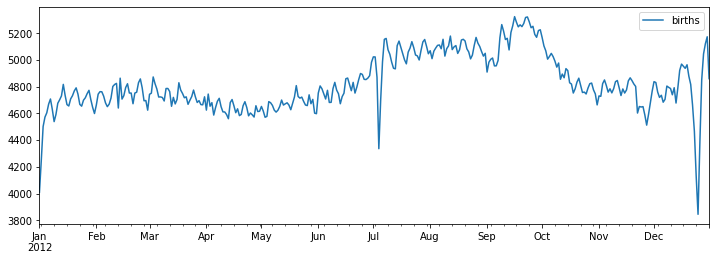

In [14]:
fix, ax = plt.subplots(figsize = (12,4))
births_by_date.plot(ax=ax)

[Text(0.5, 1.0, 'USA births by day of year (1969 - 1988)'),
 Text(0, 0.5, 'average daily births')]

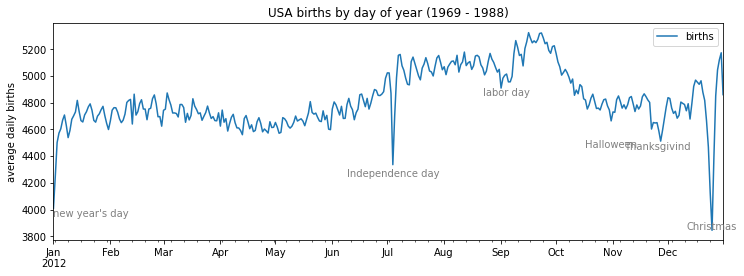

In [17]:
fix, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax=ax)

style = dict(size = 10, color = 'gray')

ax.text('2012-1-1', 3950, "new year's day", **style)
ax.text('2012-7-4', 4250, "Independence day", ha = 'center', **style)
ax.text('2012-9-4', 4850, "labor day", ha = 'center', **style)
ax.text('2012-10-31', 4460, "Halloween", ha = 'center', **style)
ax.text('2012-11-25', 4450, "Thanksgivind", ha = 'center', **style)
ax.text('2012-12-25', 3850, "Christmas", ha = 'center', **style)

ax.set(title = 'USA births by day of year (1969 - 1988)', ylabel = 'average daily births')
